## EXPLORATORY DATA ANALYSIS

#inserting python libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Introducing the dataset

In [70]:
df = pd.read_csv("CALL_Details - CALL_Details.csv")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15132\4211220078.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CALL_Details - CALL_Details.csv")


 Data Reading and Descriptive Statistics

In [71]:
df.head()

,Call Time,Campaign Name,Phone,Call Type,System Disposition,Customer Talk Time,User ID,User Name,Disposition Code,Disposition Class
0,13-04-2022 09:05,L&T NEW,723,outbound.manual.dial,ATTEMPT_FAILED,00:00:00,Jaswinderk,Jaswinder Kaur,NaN,NaN
1,13-04-2022 09:06,L&T NEW,723,outbound.manual.dial,PROVIDER_TEMP_FAILURE,00:00:00,Jaswinderk,Jaswinder Kaur,Abrupt disconnection,telecom.issues
2,13-04-2022 09:08,L&T NEW,8878327032,outbound.callback.dial,ATTEMPT_FAILED,00:00:00,NaN,NaN,NaN,NaN
3,13-04-2022 09:08,L&T NEW,723,outbound.manual.dial,ATTEMPT_FAILED,00:00:00,Jaswinderk,Jaswinder Kaur,NaN,NaN
4,13-04-2022 09:10,L&T NEW,8778764008,outbound.callback.dial,PROVIDER_TEMP_FAILURE,00:00:00,Jaswinderk,Jaswinder Kaur,wrap.timeout,campaign.system.disposition


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112258 entries, 0 to 112257
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Call Time           112258 non-null  object
 1   Campaign Name       112258 non-null  object
 2   Phone               112114 non-null  object
 3   Call Type           112258 non-null  object
 4   System Disposition  112258 non-null  object
 5   Customer Talk Time  112258 non-null  object
 6   User ID             12927 non-null   object
 7   User Name           12927 non-null   object
 8   Disposition Code    12217 non-null   object
 9   Disposition Class   12217 non-null   object
dtypes: object(10)
memory usage: 8.6+ MB


In [68]:
df.shape

(112258, 10)

In [8]:
df.describe(include = 'all')

,Call Time,Campaign Name,Phone,Call Type,System Disposition,Customer Talk Time,User ID,User Name,Disposition Code,Disposition Class
count,112258,112258,112114,112258,112258,112258,12927,12927,12217,12217
unique,17012,1,6729,4,10,346,4,4,39,17
top,21-04-2022 11:02,L&T NEW,8638604237,outbound.auto.dial,PROVIDER_TEMP_FAILURE,00:00:00,Dikshak,Diksha kushwaha,No_Response,Non_Contactable
freq,321,112258,2140,70621,40093,104488,4462,4462,2940,3001


In [21]:
df = pd.read_csv("CALL_Details - CALL_Details.csv")



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15132\3381196055.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CALL_Details - CALL_Details.csv")


calculating the total null values in each column

In [22]:
df.isnull().sum()

Call Time                  0
Campaign Name              0
Phone                    144
Call Type                  0
System Disposition         0
Customer Talk Time         0
User ID                99331
User Name              99331
Disposition Code      100041
Disposition Class     100041
dtype: int64

Data Cleaning

#To find the impact of users(agents), we will remove the rows with null values in User Name

In [27]:
df.dropna(subset = ['User Name'], inplace = True)


In [31]:

df.dtypes

Call Time             object
Campaign Name         object
Phone                 object
Call Type             object
System Disposition    object
Customer Talk Time    object
User ID               object
User Name             object
Disposition Code      object
Disposition Class     object
dtype: object

In [35]:
df['Disposition Class'].unique()



array([nan, 'telecom.issues', 'campaign.system.disposition',
       'Repeated CM NI', 'wrong_number', 'Non_Contactable', 'Sale',
       'schedule.callback', 'Not_Interested', 'user.forced.logged.off',
       'INTERESTED', 'campaign.media.exclusion', 'short hangup',
       'Not_Eligible', 'Language_Barrier', 'application.disposed',
       'Wrong number', 'Not Contactable'], dtype=object)

In [36]:
df['User Name'].unique()

array(['Jaswinder Kaur', nan, 'Renu rathore', 'Diksha kushwaha',
       'demouser'], dtype=object)

# Calculating the interested and not interested class

In [97]:
df = pd.read_csv("CALL_Details - CALL_Details.csv")
X = df[df['Disposition Class'] == "INTERESTED"]
Y = pd.pivot_table(X, values = "Disposition Class", index= "User Name", aggfunc = 'count')
TotalInterested = Y.rename(columns  = {'Disposition Class' :'Total Interested'})
TotalInterested


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15132\1101214549.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CALL_Details - CALL_Details.csv")


,Total Interested
User Name,
Diksha kushwaha,200
Jaswinder Kaur,16
Renu rathore,100


In [98]:
X  = df[df['Disposition Class'] == "Not_Interested"]
Y= pd.pivot_table(X, values = "Disposition Class",index = "User Name", aggfunc = 'count')
NotInterested = Y.rename(columns = {'Disposition Class' : 'Total Not Interested'})
NotInterested

,Total Not Interested
User Name,
Diksha kushwaha,963
Jaswinder Kaur,486
Renu rathore,646


In [100]:
IandNI = pd.concat([TotalInterested, NotInterested],axis = 1)


,Total Interested,Total Not Interested
User Name,,
Diksha kushwaha,200,963
Jaswinder Kaur,16,486
Renu rathore,100,646


In [111]:
IandNI['Ratio'] = IandNI['Total Interested']/IandNI['Total Not Interested']
IandNI = IandNI.sort_values("Ratio",ascending = False)
IandNI

,Total Interested,Total Not Interested,Ratio
User Name,,,
Diksha kushwaha,200,963,0.207684
Renu rathore,100,646,0.154799
Jaswinder Kaur,16,486,0.032922


****Ratio signifies the efficiency of each user.

<AxesSubplot:xlabel='User Name'>

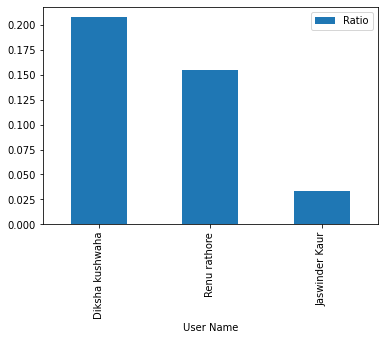

In [112]:
IandNI.plot(kind = "bar", y = "Ratio")

# To do a deep understanding of why people are straightforward not interested - 

Calculating top 5 reasons for people being not interested

In [79]:
X  = df[df['Disposition Class'] == "Not_Interested"]
Y= pd.pivot_table(X, values = "Disposition Class",index = "Disposition Code", aggfunc = 'count')
NotInterested = Y.rename(columns = {'Disposition Class' : 'Total Not Interested'})
NotInterested =  NotInterested.sort_values('Total Not Interested', ascending = False) 
NotInterested.head()


,Total Not Interested
Disposition Code,
Not_looking_for_investment,959
NI - Hungup before presentation,447
NI_reason_not_shared,226
Already_purchased-booked,193
location not Fit,86


<AxesSubplot:ylabel='Total Not Interested'>

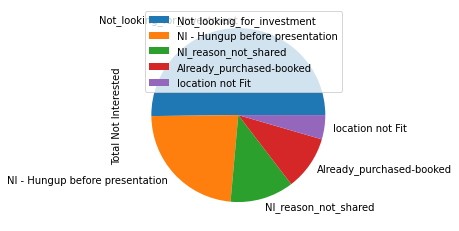

In [90]:
NotInterested.head().plot(kind = "pie", y = 'Total Not Interested')

Other reasons in the Disposition Code are either technical issues or do not show consumer behaviour directly.